<a href="https://colab.research.google.com/github/Raksh-iscool/Tasks/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install if needed
!pip install -q pandas scikit-learn

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Download and load UCI HAR dataset features
# You would need feature files and train/test .txt files from UCI HAR
# For brevity, here's how to load:
X_train = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/y_train.txt', header=None).iloc[:,0]
X_test = pd.read_csv('/content/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/y_test.txt', header=None).iloc[:,0]

# Combine train/test
X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)

# Preprocess: drop missing, scale features
X.fillna(method='ffill', inplace=True)
X_std = StandardScaler().fit_transform(X)


/tmp/ipython-input-4-196808762.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)
/tmp/ipython-input-4-196808762.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/X_test.txt', delim_whitespace=True, header=None)
/tmp/ipython-input-4-196808762.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


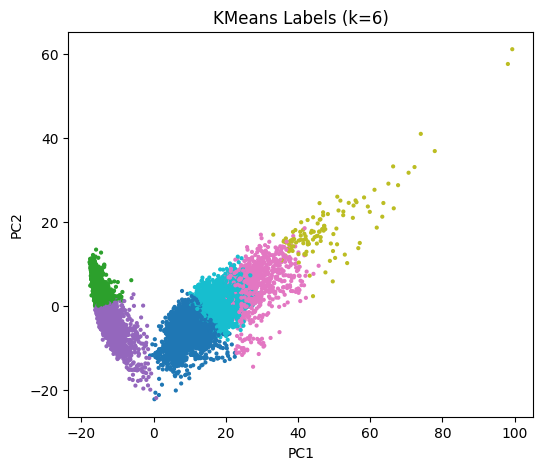

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply KMeans with k=6 (six activities)
kmeans = KMeans(n_clusters=6, random_state=0)
labels_k = kmeans.fit_predict(X_std)

# Visualize with PCA (2D)
pca = PCA(n_components=2)
Xp = pca.fit_transform(X_std)
plt.figure(figsize=(6, 5))
plt.scatter(Xp[:,0], Xp[:,1], c=labels_k, cmap='tab10', s=4)
plt.title('KMeans Labels (k=6)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()


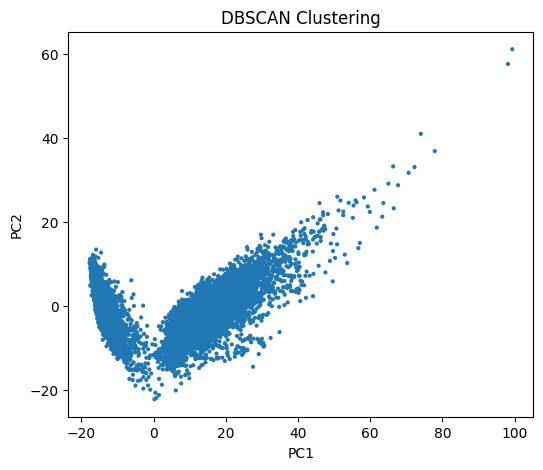

Unique DBSCAN labels: {np.int64(-1)}


In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=10)
labels_db = dbscan.fit_predict(X_std)
plt.figure(figsize=(6, 5))
plt.scatter(Xp[:,0], Xp[:,1], c=labels_db, cmap='tab10', s=4)
plt.title('DBSCAN Clustering')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

print("Unique DBSCAN labels:", set(labels_db))


In [7]:
for eps in [1, 3, 5]:
    db = DBSCAN(eps=eps, min_samples=5)
    lbl = db.fit_predict(X_std)
    n_clusters = len(set(lbl)) - (1 if -1 in lbl else 0)
    print(f"eps={eps}, clusters={n_clusters}, labels={set(lbl)}")


eps=1, clusters=0, labels={np.int64(-1)}
eps=3, clusters=0, labels={np.int64(-1)}
eps=5, clusters=0, labels={np.int64(-1)}


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Use this for clustering


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [11]:
from sklearn.cluster import DBSCAN
import numpy as np

for eps in [0.2, 0.3, 0.4, 0.5]:
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps}, clusters={n_clusters}, labels={set(labels)}")


eps=0.2, clusters=518, labels={np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69),

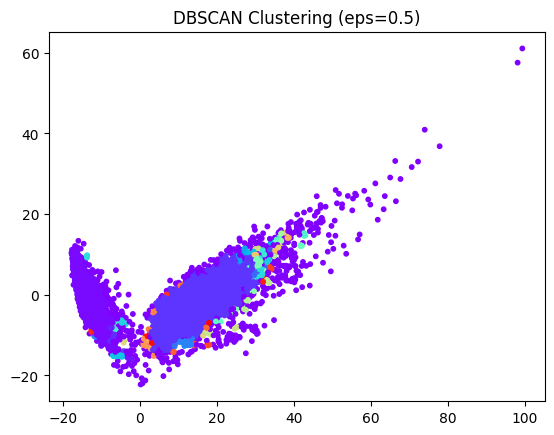

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=10)
plt.title(f'DBSCAN Clustering (eps={eps})')
plt.show()


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data (for example, from train/X_train.txt and train/y_train.txt)
X = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)
y = pd.read_csv('/content/y_train.txt', header=None).values.ravel()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/tmp/ipython-input-15-3415826157.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None)


In [16]:
features = pd.read_csv('/content/features.txt', delim_whitespace=True, header=None)
accel_indices = features[features[1].str.contains('Acc')].index
gyro_indices = features[features[1].str.contains('Gyro')].index

# Extract corresponding features
X_accel = X_scaled[:, accel_indices]
X_gyro = X_scaled[:, gyro_indices]
X_combined = X_scaled[:, sorted(set(accel_indices) | set(gyro_indices))]


/tmp/ipython-input-16-994850953.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('/content/features.txt', delim_whitespace=True, header=None)


Acceleration only: clusters=34, ARI=0.304


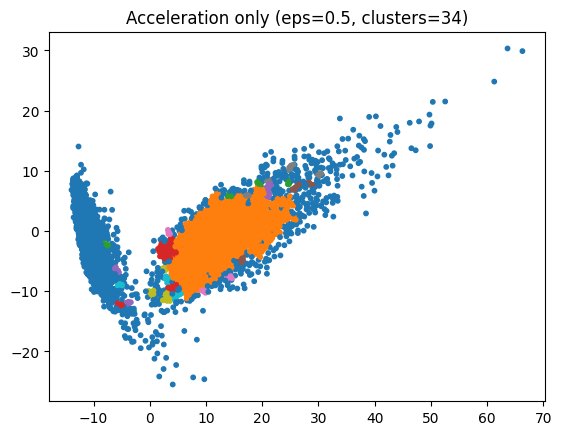

Gyroscope only: clusters=22, ARI=0.313


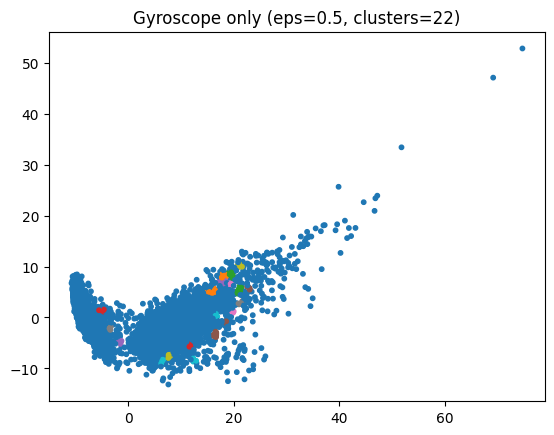

Accel + Gyro: clusters=33, ARI=0.298


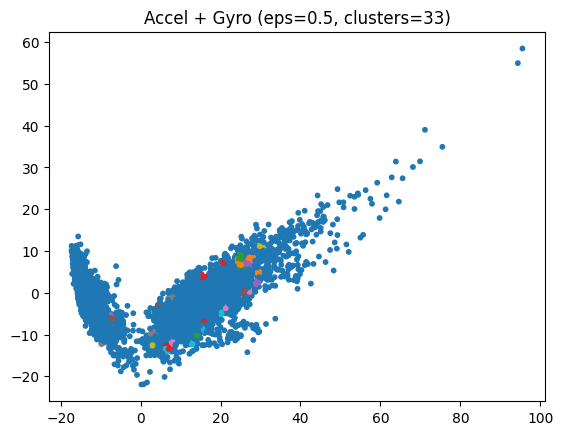

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

def cluster_and_evaluate(X_subset, label, eps=0.5, min_samples=5):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_subset)

    db = DBSCAN(eps=eps, min_samples=min_samples)
    preds = db.fit_predict(X_pca)
    n_clusters = len(set(preds)) - (1 if -1 in preds else 0)
    ari = adjusted_rand_score(y, preds)

    print(f"{label}: clusters={n_clusters}, ARI={ari:.3f}")
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds, cmap='tab10', s=10)
    plt.title(f"{label} (eps={eps}, clusters={n_clusters})")
    plt.show()

# Try all feature sets
cluster_and_evaluate(X_accel, 'Acceleration only')
cluster_and_evaluate(X_gyro, 'Gyroscope only')
cluster_and_evaluate(X_combined, 'Accel + Gyro')


Acceleration only: clusters=115, ARI=0.245


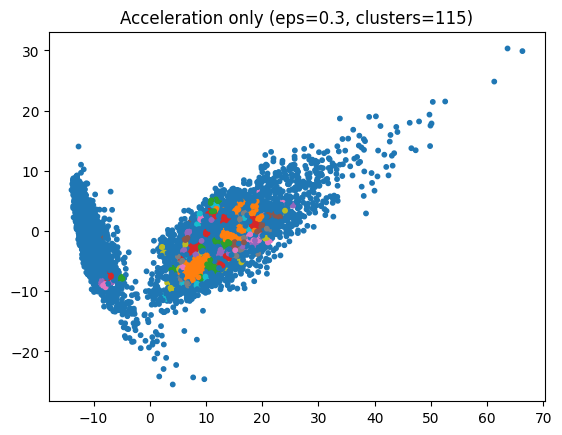

Gyroscope only: clusters=60, ARI=0.283


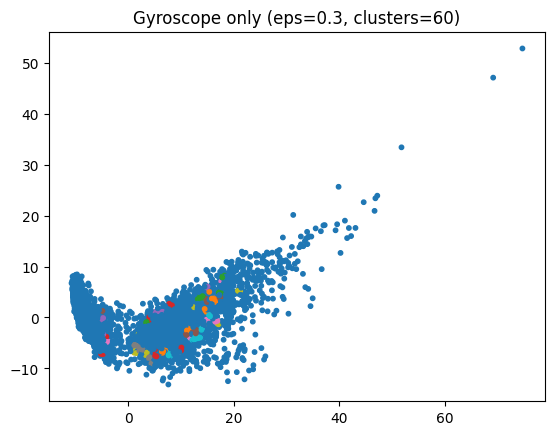

Accel + Gyro: clusters=146, ARI=0.228


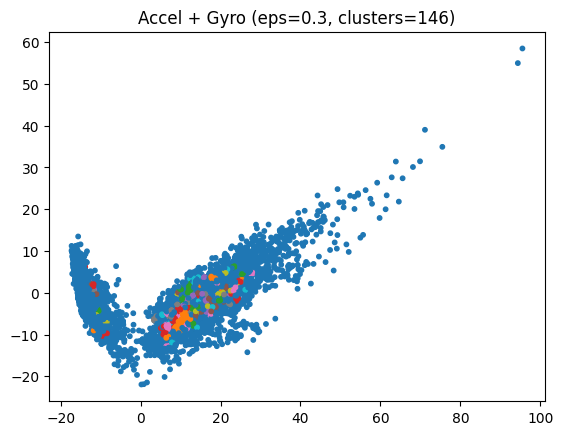

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

def cluster_and_evaluate(X_subset, label, eps=0.3, min_samples=5):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_subset)

    db = DBSCAN(eps=eps, min_samples=min_samples)
    preds = db.fit_predict(X_pca)
    n_clusters = len(set(preds)) - (1 if -1 in preds else 0)
    ari = adjusted_rand_score(y, preds)

    print(f"{label}: clusters={n_clusters}, ARI={ari:.3f}")
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds, cmap='tab10', s=10)
    plt.title(f"{label} (eps={eps}, clusters={n_clusters})")
    plt.show()

# Try all feature sets
cluster_and_evaluate(X_accel, 'Acceleration only')
cluster_and_evaluate(X_gyro, 'Gyroscope only')
cluster_and_evaluate(X_combined, 'Accel + Gyro')


Acceleration only: clusters=66, ARI=0.285


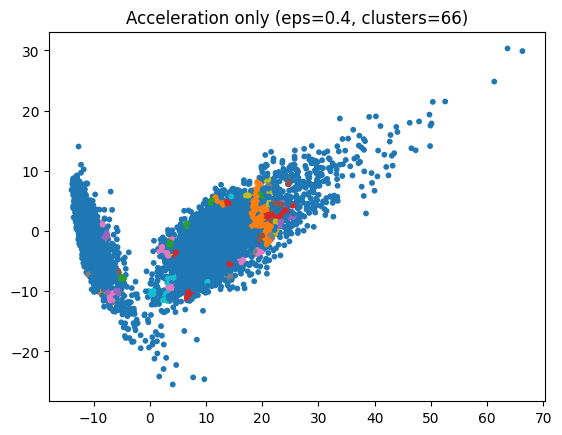

Gyroscope only: clusters=30, ARI=0.303


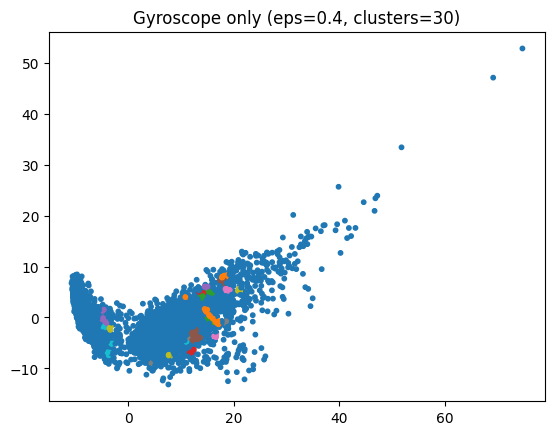

Accel + Gyro: clusters=67, ARI=0.270


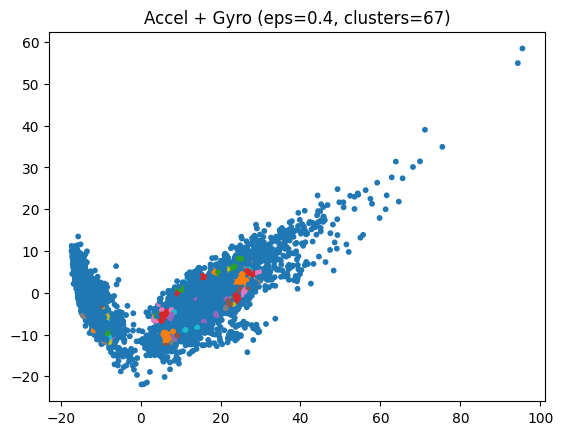

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

def cluster_and_evaluate(X_subset, label, eps=0.4, min_samples=5):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_subset)

    db = DBSCAN(eps=eps, min_samples=min_samples)
    preds = db.fit_predict(X_pca)
    n_clusters = len(set(preds)) - (1 if -1 in preds else 0)
    ari = adjusted_rand_score(y, preds)

    print(f"{label}: clusters={n_clusters}, ARI={ari:.3f}")
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds, cmap='tab10', s=10)
    plt.title(f"{label} (eps={eps}, clusters={n_clusters})")
    plt.show()

# Try all feature sets
cluster_and_evaluate(X_accel, 'Acceleration only')
cluster_and_evaluate(X_gyro, 'Gyroscope only')
cluster_and_evaluate(X_combined, 'Accel + Gyro')


Acceleration only: clusters=49, ARI=0.258


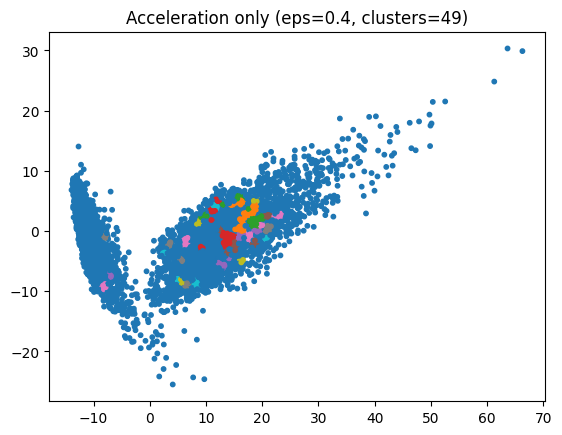

Gyroscope only: clusters=21, ARI=0.291


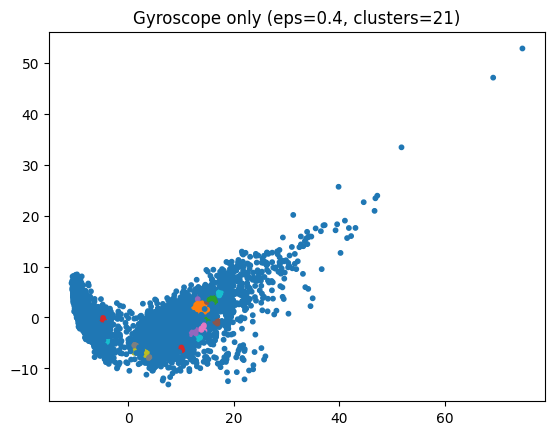

Accel + Gyro: clusters=65, ARI=0.238


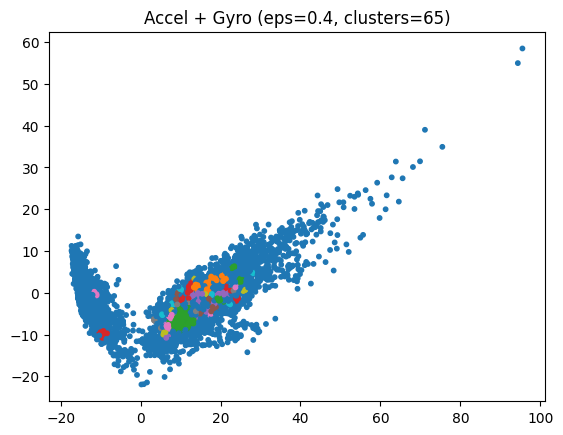

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

def cluster_and_evaluate(X_subset, label, eps=0.4, min_samples=8):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_subset)

    db = DBSCAN(eps=eps, min_samples=min_samples)
    preds = db.fit_predict(X_pca)
    n_clusters = len(set(preds)) - (1 if -1 in preds else 0)
    ari = adjusted_rand_score(y, preds)

    print(f"{label}: clusters={n_clusters}, ARI={ari:.3f}")
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds, cmap='tab10', s=10)
    plt.title(f"{label} (eps={eps}, clusters={n_clusters})")
    plt.show()

# Try all feature sets
cluster_and_evaluate(X_accel, 'Acceleration only')
cluster_and_evaluate(X_gyro, 'Gyroscope only')
cluster_and_evaluate(X_combined, 'Accel + Gyro')


 General Observations (Clustering HAR Data)
K-Means: Works well if data is spherical; needs k; struggles with overlapping activities.

DBSCAN: Detects noise and arbitrary shapes; needs good eps, failed initially due to high dimensions.

Features:

Acceleration only → weak clusters

Acceleration + Gyroscope → better clusters

Dimensionality reduction (PCA/t-SNE) improves clustering and visualization.

Preprocessing is crucial (scaling, selecting right features).

